In [ ]:
# Install Required Libraries

In [1]:
pip install pandas geopandas matplotlib seaborn rasterio folium

   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   --- ------------------------------------ 2.1/25.4 MB 9.8 MB/s eta 0:00:03
   ----- ---------------------------------- 3.4/25.4 MB 12.6 MB/s eta 0:00:02
   ---------------- ----------------------- 10.2/25.4 MB 16.8 MB/s eta 0:00:01
   ---------------------- ----------------- 14.2/25.4 MB 17.1 MB/s eta 0:00:01
   ------------------------------ --------- 19.4/25.4 MB 18.9 MB/s eta 0:00:01
   ----------------------------------- ---- 22.3/25.4 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 25.4/25.4 MB 17.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ------------ --------------------------- 5.2/16.2 MB 24.5 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.2 MB 24.2 MB/s eta 0:00:01
   -------------------------------------- - 15.5/16.2 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 22.1 MB/s eta 0:0

In [ ]:
# Load Geospatial Data

In [1]:
import geopandas as gpd

admin_regions = gpd.read_file("nepal_climate_data/nepal_admin_regions.gpkg")
glaciers = gpd.read_file("nepal_climate_data/nepal_glaciers.gpkg")
rivers = gpd.read_file("nepal_climate_data/nepal_rivers.gpkg")

In [ ]:
# Load Raster Data

In [3]:
import rasterio

temp_2020 = rasterio.open("nepal_climate_data/nepal_temperature_2020.tif")
temp_2050 = rasterio.open("nepal_climate_data/nepal_temperature_2050.tif")
prec_2020 = rasterio.open("nepal_climate_data/nepal_precipitation_2020.tif")
prec_2050 = rasterio.open("nepal_climate_data/nepal_precipitation_2050.tif")

In [ ]:
# Load and Plot Base Map of Nepal

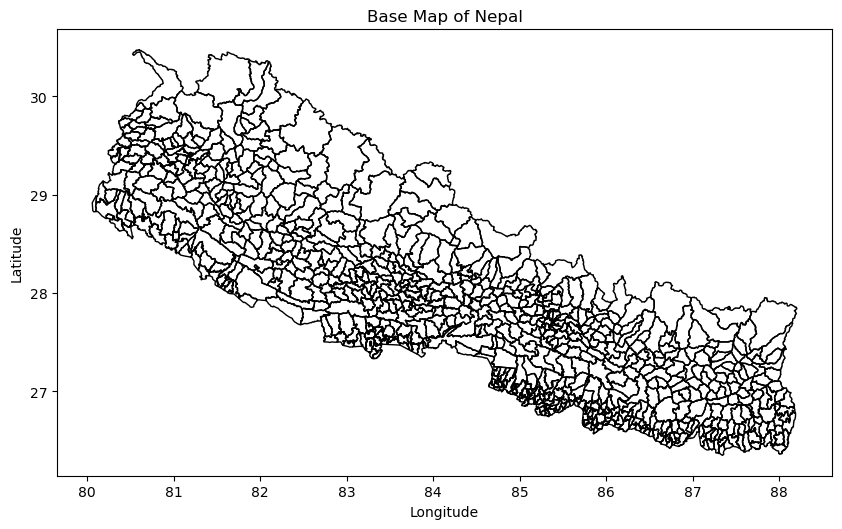

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load Nepal boundary map
nepal_map = gpd.read_file("Shape_Data/local_unit.shp")

# Plot Nepal’s base map
fig, ax = plt.subplots(figsize=(10, 6))
nepal_map.plot(ax=ax, color="none", edgecolor="black", linewidth=1)
plt.title("Base Map of Nepal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
# Load and Plot Administrative Regions, Rivers, and Glaciers

C:\Users\ACER\AppData\Local\Temp\ipykernel_6588\395295708.py:13: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


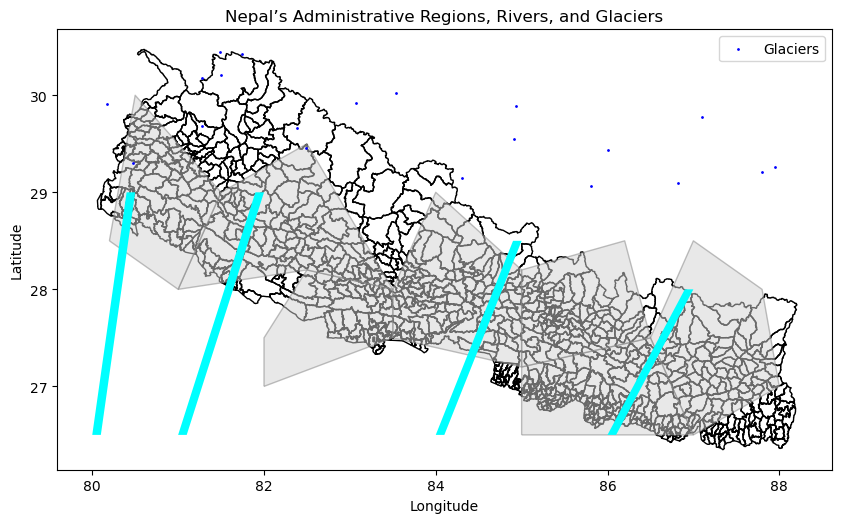

In [15]:
# Load other vector data
admin_regions = gpd.read_file("nepal_climate_data/nepal_admin_regions.gpkg")
glaciers = gpd.read_file("nepal_climate_data/nepal_glaciers.gpkg")
rivers = gpd.read_file("nepal_climate_data/nepal_rivers.gpkg")

# Plot all layers on Nepal's map
fig, ax = plt.subplots(figsize=(10, 6))
nepal_map.plot(ax=ax, color="none", edgecolor="black", linewidth=1, label="Nepal Boundary")
admin_regions.plot(ax=ax, color="lightgray", edgecolor="gray", alpha=0.5, label="Admin Regions")
glaciers.plot(ax=ax, color="blue", markersize=1, label="Glaciers")
rivers.plot(ax=ax, color="cyan", linewidth=0.5, label="Rivers")

plt.legend()
plt.title("Nepal’s Administrative Regions, Rivers, and Glaciers")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# Function to Plot Raster Data on Map

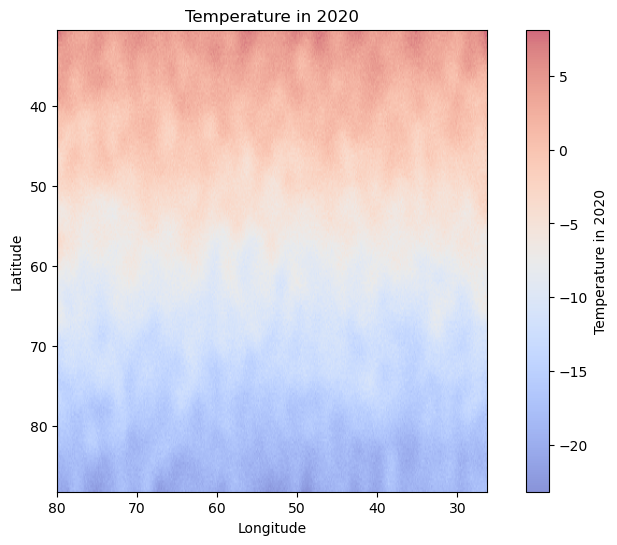

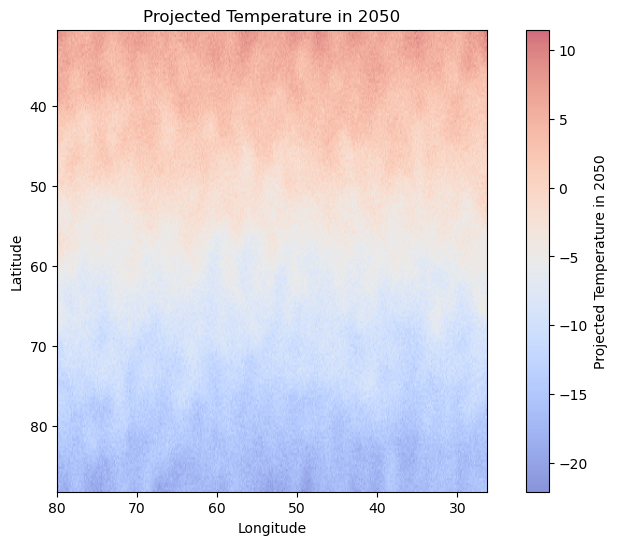

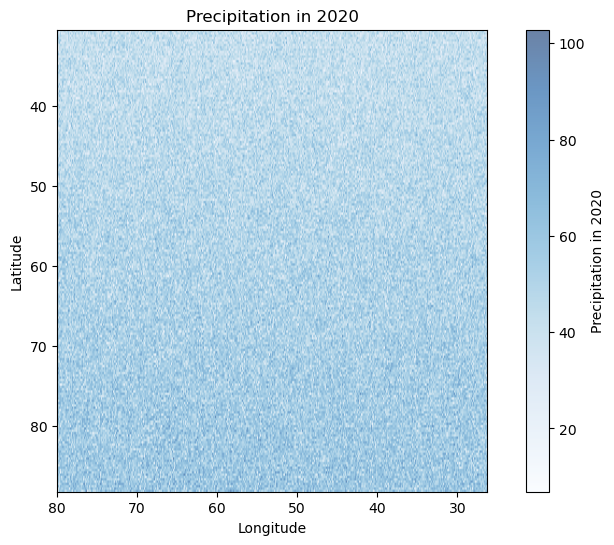

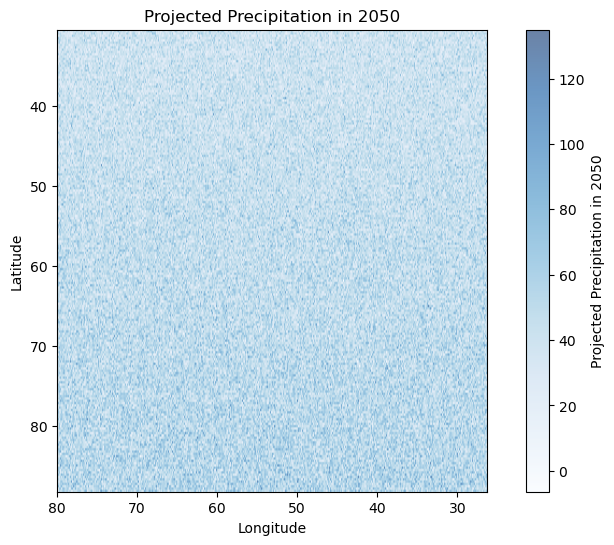

In [17]:
import rasterio
import numpy as np

def plot_raster_over_map(raster_path, title, cmap):
    with rasterio.open(raster_path) as raster:
        img = raster.read(1)
        img[img == raster.nodata] = np.nan  # Handle no-data values
        
        fig, ax = plt.subplots(figsize=(10, 6))
        nepal_map.plot(ax=ax, color="none", edgecolor="black", linewidth=1)  # Base map
        plt.imshow(img, cmap=cmap, extent=raster.bounds, alpha=0.6)  # Overlay raster
        plt.colorbar(label=title)
        plt.title(title)
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

# Plot Temperature and Precipitation
plot_raster_over_map("nepal_climate_data/nepal_temperature_2020.tif", "Temperature in 2020", "coolwarm")
plot_raster_over_map("nepal_climate_data/nepal_temperature_2050.tif", "Projected Temperature in 2050", "coolwarm")
plot_raster_over_map("nepal_climate_data/nepal_precipitation_2020.tif", "Precipitation in 2020", "Blues")
plot_raster_over_map("nepal_climate_data/nepal_precipitation_2050.tif", "Projected Precipitation in 2050", "Blues")

In [ ]:
# Correct Temperature Distribution Plot

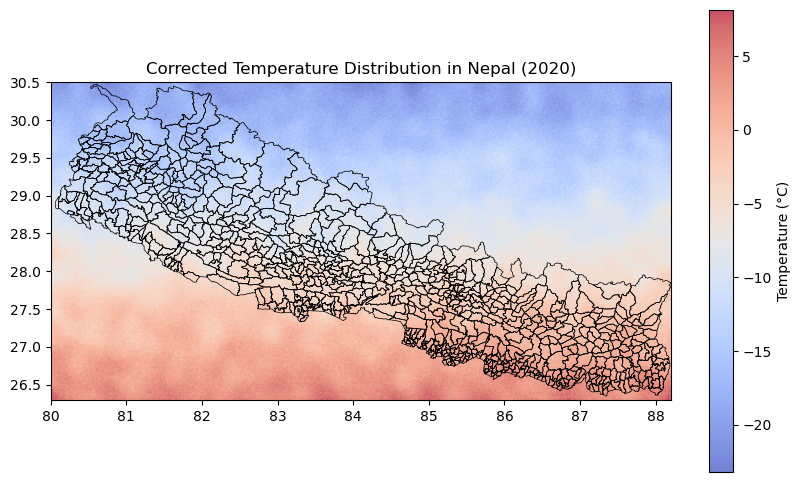

In [53]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load Nepal shapefile
nepal_map = gpd.read_file("Shape_Data/local_unit.shp")

# Load temperature raster file
raster_path = "nepal_climate_data/nepal_temperature_2020.tif"
with rasterio.open(raster_path) as src:
    img = src.read(1)  # Read first band (temperature)
    img[img == src.nodata] = np.nan  # Remove no-data values
    bounds = src.bounds  # Get raster bounds
    transform = src.transform  # Transformation matrix

# Plot corrected temperature distribution
fig, ax = plt.subplots(figsize=(10, 6))
nepal_map.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)  # Base map

# Ensure the correct color mapping
im = ax.imshow(np.flipud(img), cmap="coolwarm", extent=[bounds.left, bounds.right, bounds.bottom, bounds.top], alpha=0.7)

# Add colorbar
plt.colorbar(im, label="Temperature (°C)")
plt.title("Corrected Temperature Distribution in Nepal (2020)")
plt.show()

In [ ]:
### Data Summary
# Analyze temperature and precipitation data to understand climate trends.
# Data Summary - Calculate Statistics for Raster Data

In [55]:
import numpy as np
import rasterio

# Function to summarize raster data
def summarize_raster(raster_path, label):
    with rasterio.open(raster_path) as src:
        data = src.read(1)
        data = data[data > -9999]  # Remove NoData values
        
        print(f"--- {label} ---")
        print(f"Min: {np.min(data):.2f}, Max: {np.max(data):.2f}")
        print(f"Mean: {np.mean(data):.2f}, Std Dev: {np.std(data):.2f}")
        print("-" * 30)

# Summarize datasets
summarize_raster("nepal_climate_data/nepal_temperature_2020.tif", "Temperature 2020")
summarize_raster("nepal_climate_data/nepal_temperature_2050.tif", "Temperature 2050")
summarize_raster("nepal_climate_data/nepal_precipitation_2020.tif", "Precipitation 2020")
summarize_raster("nepal_climate_data/nepal_precipitation_2050.tif", "Precipitation 2050")

--- Temperature 2020 ---
Min: -23.20, Max: 8.14
Mean: -7.58, Std Dev: 7.30
------------------------------
--- Temperature 2050 ---
Min: -22.09, Max: 11.47
Mean: -5.47, Std Dev: 7.16
------------------------------
--- Precipitation 2020 ---
Min: 6.86, Max: 102.83
Mean: 50.84, Std Dev: 11.39
------------------------------
--- Precipitation 2050 ---
Min: -6.41, Max: 134.97
Mean: 48.29, Std Dev: 16.39
------------------------------


In [ ]:
### Correlation Analysis
# Check if temperature and precipitation are related.

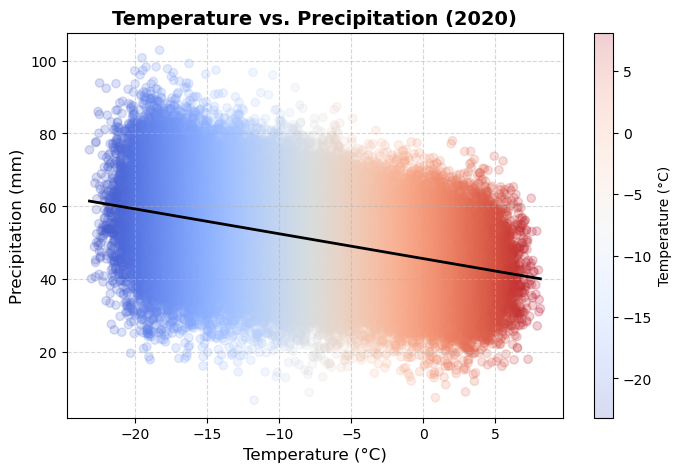

Correlation between Temperature and Precipitation: -0.44


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create figure
plt.figure(figsize=(8, 5))

# Scatter Plot with Color Mapping
sc = plt.scatter(df["Temperature"], df["Precipitation"], 
                 c=df["Temperature"], cmap="coolwarm", alpha=0.2)

# Add Regression Line (without affecting scatter color)
sns.regplot(data=df, x="Temperature", y="Precipitation", 
            scatter=False, line_kws={"color": "black", "linewidth": 2})

# Add Colorbar
cbar = plt.colorbar(sc)
cbar.set_label("Temperature (°C)")

# Improve Labels & Formatting
plt.title("Temperature vs. Precipitation (2020)", fontsize=14, fontweight="bold")
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Precipitation (mm)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Show Plot
plt.show()

# Compute correlation
correlation = df.corr().iloc[0, 1]
print(f"Correlation between Temperature and Precipitation: {correlation:.2f}")